# *"Tagihan Kesehatan"*

### Mengeksplorasi Variabilitas dan Analisis Komprehensif tentang Faktor-faktor yang Mempengaruhi

# Introduction

Dalam era kesehatan modern, pemahaman mendalam terhadap faktor-faktor yang mempengaruhi tagihan kesehatan menjadi krusial. Analisis ini tidak hanya mencakup berbagai faktor seperti kebiasaan merokok, indeks massa tubuh (BMI), dan jumlah tanggungan anak, tetapi juga mengeksplorasi variabilitas yang ada dalam tagihan kesehatan. Dalam penelitian ini, kita akan memperdalam wawasan tentang bagaimana keputusan sehari-hari, seperti kebiasaan merokok, berhubungan dengan tagihan kesehatan. Selain itu, proyek ini bertujuan untuk memberikan pemahaman yang komprehensif tentang sejauh mana faktor-faktor ini berkontribusi terhadap perbedaan dalam tagihan kesehatan. Melalui analisis yang mendalam, kita berusaha menjawab pertanyaan kritis terkait variabilitas dan pengaruh faktor-faktor tertentu dalam konteks tagihan kesehatan.

## Research Question

### 1. Analisa Descriptive Statistic

1. Berapa rata rata umur pada dataset
2. Berapa rata rata nilai BMI dari yang merokok
3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama
4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama
5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok
6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)
7. BMI mana yang lebih tinggi, seseorang perokok atau non perokok

### 2. Analisa Variabel Diskrit

1. Gender mana yang memiliki tagihan paling tinggi
2. Distribusi peluang tagihan di tiap-tiap region
3. Apakah setiap region memiliki proporsi data banyak orang yang sama
4. Mana yang lebih tinggi proporsi perokok atau non perokok
5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok
6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok
7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region

### 3. Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi:

    - Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
    - Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

2. Mana yang lebih mungkin terjadi:

    - Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
    - Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

### 4. Analisa Korelasi Variabel
1. Korelasi tagihan kesehatan dengan BMI
2. Korelasi tagihan kesehatan dengan tanggungan anak.

### 5. Pengujian Hipotesis

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Variansi tagihan kesehatan perokok dan non perokok sama
3. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

## Langkah - langkah Pengerjaan Project 
1. Dataset
    - Accessing dataset
    - Load dataset
    - Create dataframe
2. Exploration and Processing
    - NaN identification
    - Outlier identification
    - Identify inconsistent format
    - Identify duplicate data
    - Other checks required
3. Explorating Data and Analysis

In [1]:
# Import library yang dibutuhkan
import pandas as pd  # Library untuk manipulasi data menggunakan DataFrame
import matplotlib.pyplot as plt  # Library untuk visualisasi data
import numpy as np  # Library untuk operasi numerik
import seaborn as sns  # Library untuk visualisasi data statistik

import warnings
warnings.filterwarnings("ignore")  # Mematikan peringatan agar tidak muncul pada output

## 1. Dataset

Akses, Load dan Create Dataframe

In [2]:
# Deklarasi variable df untuk membaca file insurance.csv
df = pd.read_csv('insurance.csv')

In [3]:
# Overview dataframe
df.head()  # Menampilkan 5 baris pertama dari dataframe untuk mendapatkan gambaran awal

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Overview info dataframe
# Untuk melihat lebih jauh tipe-tipe data pada setiap kolom
df.info()  # Menampilkan informasi singkat tentang struktur dataframe, termasuk tipe data dan jumlah nilai non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2. Exploration and Processing

2.1 Identifikasi Nilai Kosong (NaN)

In [5]:
# Cek nilai NaN pada dataframe
df.isna().sum()  # Menampilkan jumlah nilai NaN (missing values) untuk setiap kolom

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Terlihat tidak ada nilai kosong (NaN) pada dataframe

2.2 Identifikasi Nilai Duplikat

In [6]:
# Cek nilai duplikat pada dataframe
df[df.duplicated(keep=False)]  # Menampilkan baris yang merupakan duplikat, dengan menandai semua entri duplikat

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


- Terlihat ada 2 baris data dengan nilai yang sama, kita asumsikan hal ini adalah nilai duplikat
- Maka kita hapus baris terakhir pada baris tersebut

In [7]:
# Hapus nilai duplikat
# Dengan pengecualian nilai awal
df = df.drop_duplicates(keep='first').reset_index(drop=True)  # Menghapus duplikat dan mengatur ulang indeks

In [8]:
# Cek kembali nilai duplikat pada dataframe
df[df.duplicated(keep=False)]  # Memastikan bahwa tidak ada lagi duplikat setelah operasi penghapusan

,age,sex,bmi,children,smoker,region,charges


- Tidak ada nilai yang muncul pada tiap-tiap kolom yang artinya tidak ada lagi nilai duplikat

## 3. Explorating Data Analyst

### 3.1 Analisa Descriptive Statistic

3.1.1 Berapa rata rata umur pada dataframe

In [9]:
# Hitung rata-rata umur pada dataframe
avg_umur = df['age'].mean()
print(f'Rata-rata umur: {avg_umur:.2f} tahun')

Rata-rata umur: 39.22 tahun


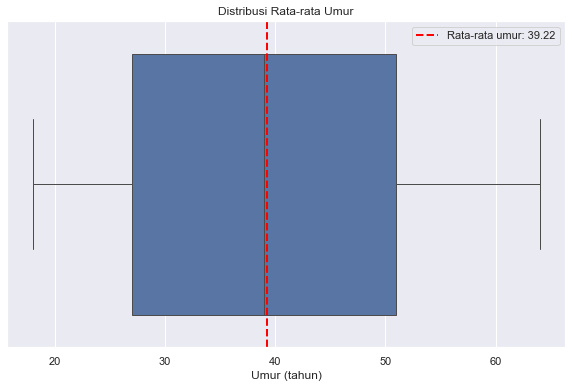

In [10]:
# Visualisasi rata-rata umur menggunakan boxplot
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.axvline(avg_umur, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata umur: {avg_umur:.2f}')
plt.title('Distribusi Rata-rata Umur')
plt.xlabel('Umur (tahun)')
plt.legend()
plt.show()

- Terlihat rata-rata umur pada dataframe adalah: 39.22 tahun

3.1.2 Berapa rata rata nilai BMI dari yang merokok

In [11]:
# Cek nilai unique pada kolom smoker/perokok apakah ada nilai selain 'yes' atau 'no'
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
# Filter nilai BMI yang smoker/perokok
bmi_smoker = df[df['smoker'] == 'yes'][['bmi','smoker']] 

bmi_smoker

,bmi,smoker
0,27.900,yes
11,26.290,yes
14,42.130,yes
19,35.300,yes
23,31.920,yes
...,...,...
1312,34.700,yes
1313,23.655,yes
1320,26.695,yes
1322,40.370,yes


In [13]:
# Hitung nilai rata-rata BMI yang perokok
avg_bmi_smoker = df[df['smoker'] == 'yes']['bmi'].mean()

print(f'Rata-rata BMI yang perokok: {avg_bmi_smoker:.2f}')

Rata-rata BMI yang perokok: 30.71


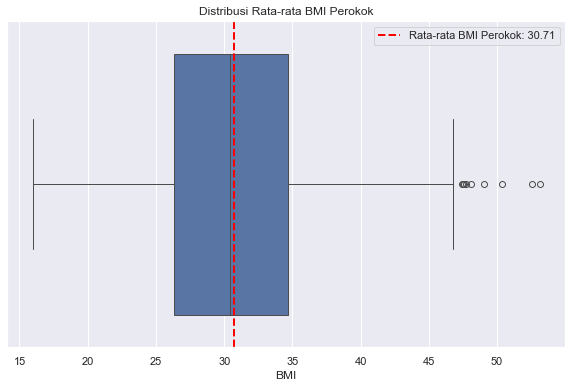

In [14]:
# Visualisasi BMI Perokok menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bmi'])
plt.axvline(avg_bmi_smoker, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata BMI Perokok: {avg_bmi_smoker:.2f}')
plt.title('Distribusi Rata-rata BMI Perokok')
plt.xlabel('BMI')
plt.legend()
plt.show()


- Dapat disimpulkan bahwa rata-rata BMI yang merokok adalah: 30.71

3.1.3 Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

In [15]:
# Hitung variansi tagihan kesehatan yang perokok
variansi_tagihan_smoker = df[df['smoker'] == 'yes']['charges'].var()

# Hitung variansi tagihan kesehatan yang non perokok
variansi_tagihan_non_smoker = df[df['smoker'] == 'no']['charges'].var()

# Print variansi tagihan kesehatan perokok dan non perokok
print(f'Variansi tagihan untuk perokok       : {variansi_tagihan_smoker:.2f}') # dibulatkan 2 angka dibelakang koma
print(f'Variansi tagihan untuk non perokok   : {variansi_tagihan_non_smoker:.2f}') # dibulatkan 2 angka dibelakang koma

Variansi tagihan untuk perokok       : 133207311.21
Variansi tagihan untuk non perokok   : 35915734.97


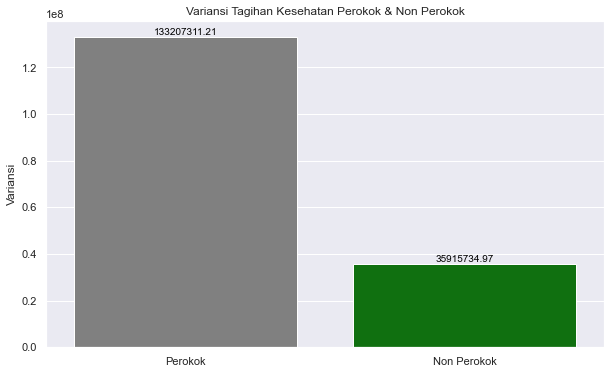

In [16]:
# Visualisasi Variansi tagihan kesehatan perokok dan non perokok
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=['Perokok', 'Non Perokok'], y=[variansi_tagihan_smoker, variansi_tagihan_non_smoker], palette=['grey', 'green'])

for i, value in enumerate([variansi_tagihan_smoker, variansi_tagihan_non_smoker]):
    plot.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Variansi Tagihan Kesehatan Perokok & Non Perokok')
plt.ylabel('Variansi')
plt.show()

- Terlihat hasil perhitungan rata-rata Variansi Tagihan kesehatan perokok dan non perokok
- Dapat disimpulkan bahwa rata-rata Variansi tagihan perokok lebih besar dibanding non perokok yaitu 133207311.21 berbanding 35925420.50

3.1.4 Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [17]:
# Menghitutng rata-rata umur Pria Perokok
avg_age_male_smoker = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]['age'].mean()

# Menghitung rata-rata umur Wanita Perokok
avg_age_female_smoker = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')]['age'].mean()


# Tampilkan hasil perhitungan rata-rata Pria dan Wanita Perokok
print(f'Rata-rata umur pria perokok  : {avg_age_male_smoker:.2f}')
print(f'Rata-rata umur wanita perokok: {avg_age_female_smoker:.2f}')

Rata-rata umur pria perokok  : 38.45
Rata-rata umur wanita perokok: 38.61


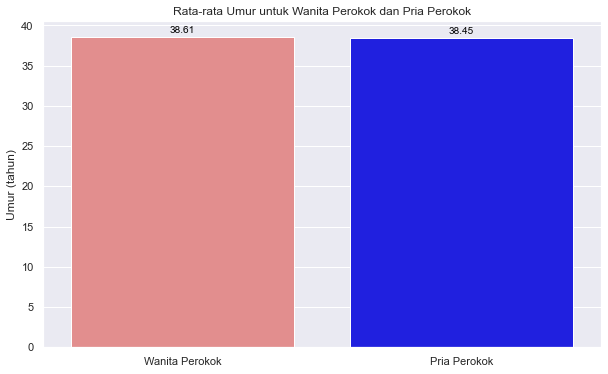

In [18]:
# Visualisasi rata-rata umur untuk Wanita Perokok dan Pria Perokok

plt.figure(figsize=(10, 6))
plot = sns.barplot(x=['Wanita Perokok', 'Pria Perokok'], y=[avg_age_female_smoker, avg_age_male_smoker], palette=['lightcoral', 'blue'])

for i, value in enumerate([avg_age_female_smoker, avg_age_male_smoker]):
    plot.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Rata-rata Umur untuk Wanita Perokok dan Pria Perokok')
plt.ylabel('Umur (tahun)')
plt.show()

- Terlihat hasil perhitungan rata-rata umur pria perokok sebesar 38.45 tahun dan rata-rata umur wanita perokok sebesar 38.61 tahun, perbedaannya cukup kecil. Perbedaan ini hanya sekitar 0.16 tahun.
- Dalam konteks ini, dapat disimpulkan bahwa tidak ada perbedaan umur yang signifikan antara pria perokok dan wanita perokok berdasarkan rata-rata umur.

3.1.5 Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok

In [19]:
# Hitung rata-rata tagihan kesehatan perokok
avg_charges_smoker =  df[df['smoker'] == 'yes']['charges'].mean()

# Hitung rata-rata tagihan kesehatan non perokok
avg_charges_non_smoker = df[df['smoker'] == 'no']['charges'].mean()

# Tampilkan hitungan rata-rata tagihan kesehatan perokok dan non perokok
print(f'Rata-rata tagihan kesehatan perokok     : {avg_charges_smoker:.2f}')
print(f'Rata-rata tagihan kesehatan non perokok : {avg_charges_non_smoker:.2f}')


Rata-rata tagihan kesehatan perokok     : 32050.23
Rata-rata tagihan kesehatan non perokok : 8440.66


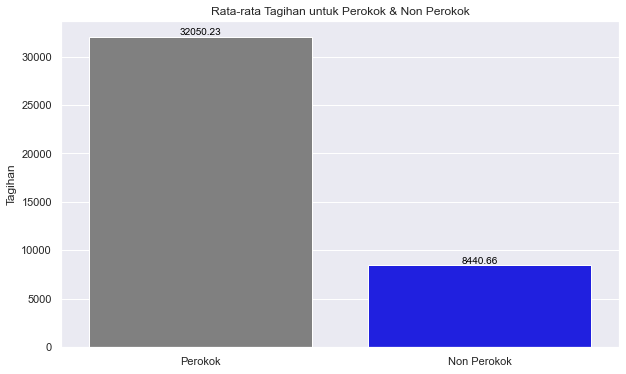

In [20]:
# Visualisasi rata-rata tagihan kesehatan untuk perokok dan non perokok
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=['Perokok', 'Non Perokok'], y=[avg_charges_smoker, avg_charges_non_smoker], palette=['grey', 'blue'])

for i, value in enumerate([avg_charges_smoker, avg_charges_non_smoker]):
    plot.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Rata-rata Tagihan untuk Perokok & Non Perokok')
plt.ylabel('Tagihan')
plt.show()

- Terlihat rata-rata tagihan perokok sebesar 32050.23 dan rata-rata tagihan non perokok sebesar 8440.66
- Dalam konteks ini dapat disimpulkan bahwa rata-rata tagihan perokok jauh lebih besar dari rata-rata tagihan non perokok

3.1.6 Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)

In [21]:
# Hitung rata-rata tagihan kesehatan perokok yang BMI nya diatas 25
avg_charges_smoker_bmi25 =  df[(df['smoker'] == 'yes') & (df['bmi'] > 25)][['charges']].mean()[0]

# Hitung rata-rata tagihan kesehatan non perokok yang BMI nya diatas 25
avg_charges_non_smoker_bmi25 =  df[(df['smoker'] == 'no') & (df['bmi'] > 25)][['charges']].mean()[0]

# Tampilkan rata-rata tagihan perokok dan nonnn perokok yang BMI diatas 25
print('Rata-rata tagihan kesehatan perokok yang BMI diatas 25       :', round(avg_charges_smoker_bmi25, 2))
print('Rata-rata tagihan kesehatan non perokok yang BMI diatas 25   :', round (avg_charges_non_smoker_bmi25, 2))

Rata-rata tagihan kesehatan perokok yang BMI diatas 25       : 35116.91
Rata-rata tagihan kesehatan non perokok yang BMI diatas 25   : 8637.61


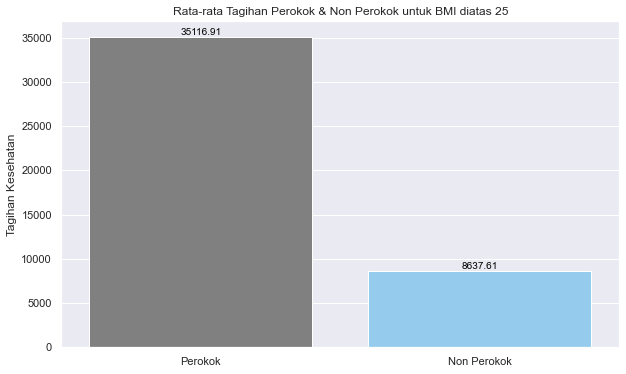

In [55]:
# Visualisasi rata-rata tagihan kesehatan untuk perokok dan non perokok yang BMI nya di atas 25
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=['Perokok', 'Non Perokok'], y=[avg_charges_smoker_bmi25, avg_charges_non_smoker_bmi25], palette=['grey', 'lightskyblue'])

for i, value in enumerate([avg_charges_smoker_bmi25, avg_charges_non_smoker_bmi25]):
    plot.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Rata-rata Tagihan Perokok & Non Perokok untuk BMI diatas 25')
plt.ylabel('Tagihan Kesehatan')
plt.show()

- Terlihat rata-rata tagihan perokok yang BMI nya diatas 25 sebesar 35116.91 dan rata-rata tagihan non perokok yang BMI  nya diatas 25 sebesar 8637.61
- Dalam konteks ini dapat disimpulkan bahwa rata-rata tagihan perokok yang BMI nya diatas 25 jauh lebih besar dari rata-rata tagihan non perokok yang BMI nya diatas 25

3.1.7 BMI mana yang lebih tinggi, seseorang perokok atau non perokok

In [23]:
# Hitung rata-rata BMI perokok
avg_bmi_smoker = df[df['smoker'] == 'yes']['bmi'].mean()

# Hitung rata-rata BMI non perokok
avg_bmi_non_smoker = df[df['smoker'] == 'no']['bmi'].mean()

# Tampilkan rata-rata BMI yang perokok dan non perokok
print(f'Rata-rata BMI perokok       : {avg_bmi_smoker:.2f}')
print(f'Rata-rata BMI non perokok   : {avg_bmi_non_smoker:.2f}')

Rata-rata BMI perokok       : 30.71
Rata-rata BMI non perokok   : 30.65


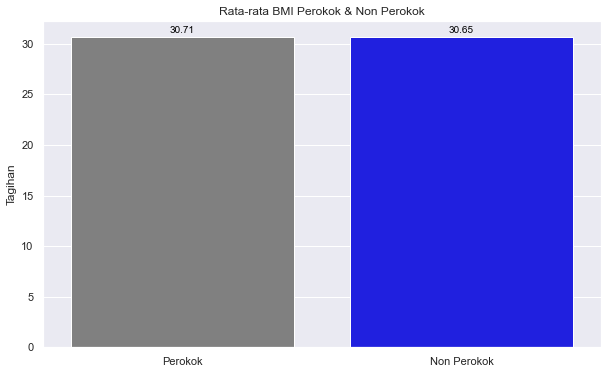

In [24]:
# Visualisasi rata-rata BMI untuk perokok dan non perokok
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=['Perokok', 'Non Perokok'], y=[avg_bmi_smoker, avg_bmi_non_smoker], palette=['grey', 'blue'])

for i, value in enumerate([avg_bmi_smoker, avg_bmi_non_smoker]):
    plot.text(i, value + 0.2, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Rata-rata BMI Perokok & Non Perokok')
plt.ylabel('Tagihan')
plt.show()

- Terlihat hasil perhitungan rata-rata BMI perokok sebesar 30.71 dan rata-rata BMI non perokok sebesar 30.65, perbedaannya cukup kecil hanya sekitar 0.06
- Dalam konteks ini dapat disimpulkan bahwa tidak ada perbedaan yang signifikan antara rata-rata BMI perokok dan BMI non perokok.

### 3.2 Analisa Variabel Diskrit

3.2.1 Gender mana yang memiliki tagihan paling tinggi

In [25]:
# Hitung rata-rata tagihan kesehatan untuk setiap gender
# Female =  Wanita
# Male = Pria
avg_charges_by_gender =  df.groupby('sex')['charges'].mean()

avg_charges_by_gender

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [26]:
# Hitung gender mana dengan tagihan kesehatan yang paling tinggi menggunakan fungsi .idmax()
# Female =  Wanita
# Male = Pria
gender_highest_charges =  avg_charges_by_gender.idxmax()

# Tampilkan gender dengan nilai rata-rata tagihan kesehatan tertinggi
print(f'Gender dengan tagihan kesehatan tertinggi adalah: {gender_highest_charges}')

Gender dengan tagihan kesehatan tertinggi adalah: male


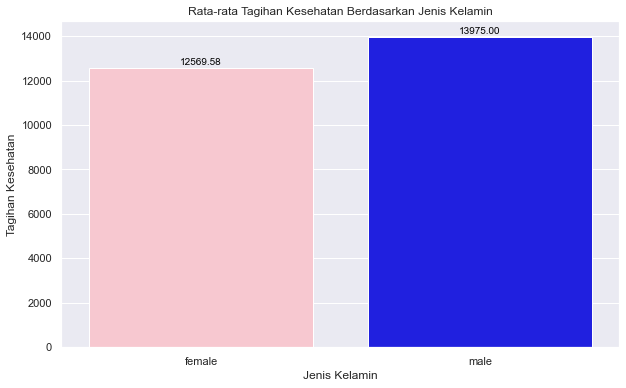

In [27]:
# Visualisasi rata-rata tagihan kesehatan untuk setiap gender
avg_charges_by_gender =  df.groupby('sex')['charges'].mean().reset_index()
colors = {'male': 'blue', 'female': 'pink'}
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='sex', y='charges', data=avg_charges_by_gender, palette=avg_charges_by_gender['sex'].map(colors).unique())
for i, value in enumerate(avg_charges_by_gender['charges']):
    plot.text(i, value + 50, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.title('Rata-rata Tagihan Kesehatan Berdasarkan Jenis Kelamin')
plt.ylabel('Tagihan Kesehatan')
plt.xlabel('Jenis Kelamin')
plt.show()


- Terlihat hasil perhitungan rata-rata tagihan kesehatan wanita sebesar 12569.58 dan rata-rata tagihan kesehatan pria sebesar 13975.00, perbedaannya cukup kecil hanya sekitar 1405.42
- Dalam konteks ini dapat disimpulkan bahwa ada perbedaan rata-rata tagihan dimana rata-rata tagihan kesehatan Pria lebih besar dibanding Wanita

3.2.2 Distribusi peluang tagihan di tiap-tiap region

In [28]:
# Tampilkan nilai statistic descrtiptive pada tiap-tiap region
dist_by_region = df.groupby('region')['charges'].describe().T

print(dist_by_region)

region     northeast     northwest     southeast     southwest
count     324.000000    324.000000    364.000000    325.000000
mean    13406.384516  12450.840844  14735.411438  12346.937377
std     11255.803066  11073.125699  13971.098589  11557.179101
min      1694.796400   1621.340200   1121.873900   1241.565000
25%      5194.322288   4733.635288   4440.886200   4751.070000
50%     10057.652025   8976.977250   9294.131950   8798.593000
75%     16687.364100  14788.747863  19526.286900  13462.520000
max     58571.074480  60021.398970  63770.428010  52590.829390


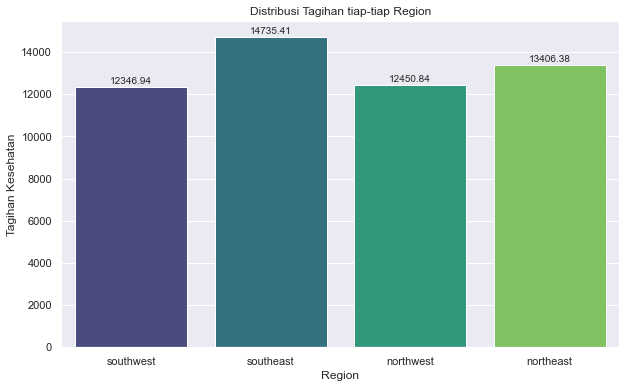

In [29]:
# Visualisasi Distribusi Tagihan tiap-tiap Region
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='region', y='charges', data=df, ci=None, palette='viridis')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'bottom', 
                     xytext = (0, 1), 
                     textcoords = 'offset points')

plt.title('Distribusi Tagihan tiap-tiap Region')
plt.xlabel('Region')
plt.ylabel('Tagihan Kesehatan')
plt.show()

- Terlihat rata-rata Distribusi tagihan tiap-tiap Region
- Dalam konteks ini, dapat disimpulkan bahwa Southeast menempati rata-rata distribusi tertinggi yaitu sebesar 14735.41 diikuti oleh Northeast sebesar 13406.38, Northwest sebesar 12450.84 dan Southwest sebesar 12346.94.

3.2.3 Apakah setiap region memiliki proporsi data banyak orang yang sama


In [30]:
# Menghitung jumlah proporsi banyak orang untuk setiap region
count_by_region = df['region'].value_counts(normalize=True)

# Tampilkan jumlah proporsi banyak orang untuk setiap region
print(count_by_region)

region
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: proportion, dtype: float64


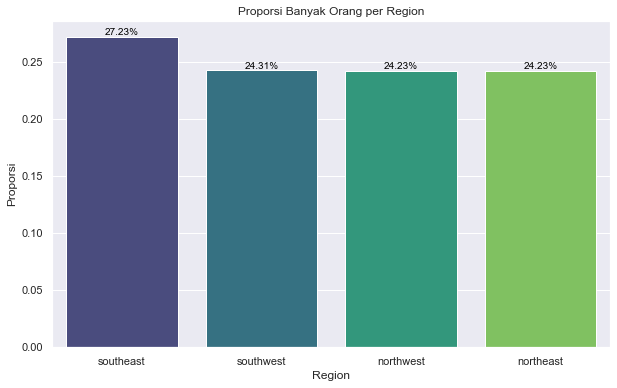

In [31]:
# Buat Visualisasi proporsi banyak orang di setiap region
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=count_by_region.index, y=count_by_region, palette='viridis')

for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 4),
                  textcoords='offset points')

plt.title('Proporsi Banyak Orang per Region')
plt.xlabel('Region')
plt.ylabel('Proporsi')
plt.show()

- Terlihat Proporsi banyak orang untuk tiap-tiap Region
- Dalam konteks ini dapat disimpulkan bahwa Northwest dan Northeast mempunyai proporsi banyak orang yang sama yaitu 24.33%, sementara proporsi tertinggi ada pada region Southeast 27.23% diikuti dengan Southwest 24.31%

3.2.4 Mana yang lebih tinggi proporsi perokok atau non perokok


In [32]:
# Hitung proporsi perokok dan non perokok
count_by_smoker = df['smoker'].value_counts(normalize=True)

# Tampilkan proporsi perokok dan non perokok
print(count_by_smoker)


smoker
no     0.795064
yes    0.204936
Name: proportion, dtype: float64


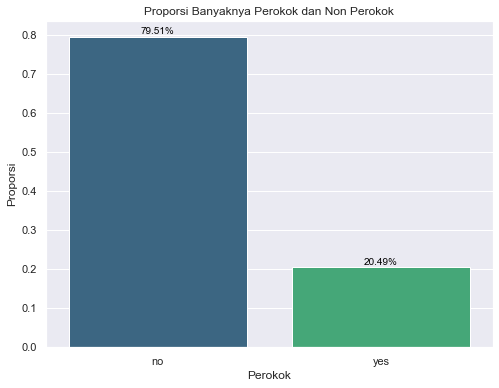

In [33]:
# Visualisasi Proporsi perokok dan non perokok
plt.figure(figsize=(8, 6))
plot = sns.barplot(x=count_by_smoker.index, y=count_by_smoker, palette='viridis')

for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')
    
plt.title('Proporsi Banyaknya Perokok dan Non Perokok')
plt.xlabel('Perokok')
plt.ylabel('Proporsi')    
plt.show()

- Terlihat Proporsi banyak orang perokok dan non perokok
- Dalam konteks ini dapat disimpulkan bahwa proporsi Non Perokok lebih banyak dibanding Perokok yaitu 79.51% berbanding 20.49%

3.2.5 Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok


In [34]:
# Hitung jumlah perokok perempuan
perempuan_perokok = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')].shape[0]

# Tampilkan jumlah perokok perempuan
print('Jumlah perokok perempuan:', perempuan_perokok)

Jumlah perokok perempuan: 115


In [35]:
# Hitung peluang perokok perempuan
# Jumlah perokok perempuan dibagi total perempuan pada df
prob_perempuan_perokok = perempuan_perokok / len(df)

# Tampilkan probabilitas perokok perempuan
print('Probabilitas perokok perempuan:', prob_perempuan_perokok)

Probabilitas perokok perempuan: 0.08601346297681377


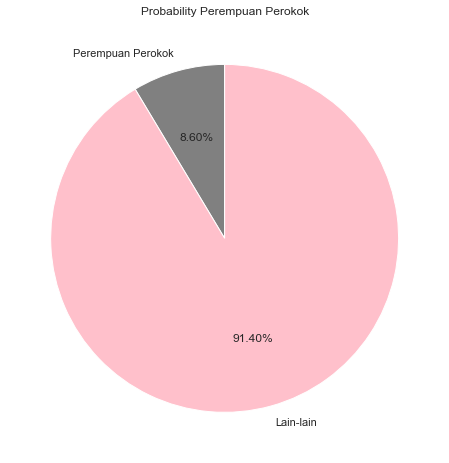

In [36]:
# Visualisasi probability perempuan perokok
sns.set_theme()
other_count_1 = len(df) - perempuan_perokok # Hitung jumlah kasus yang tidak memenuhi kriteria

# Data untuk pie chart
labels = ['Perempuan Perokok', 'Lain-lain']
sizes = [perempuan_perokok, other_count_1]
colors = ['grey', 'pink']

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Probability Perempuan Perokok')
plt.show()

- Terlihat Probability Perempuan Perokok
- Dalam konteks ini, dapat disimpulkan bahwa probability seorang peremuan perokok sebesar 8.60% berbanding lain-lain 91.40%

3.2.6 Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok


In [37]:
# Hitung jumlah perokok Laki-laki 
pria_perokok = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')].shape[0]

# Tampilkan jumlah perokok pria
print('Jumlah perokok laki-laki:', pria_perokok)

Jumlah perokok laki-laki: 159


In [38]:
# Hitung peluang perokok laki-laki
# Jumlah perokok laki-laki dibagi total laki-laki pada df

prob_pria_perokok = pria_perokok / len(df)

# Tampilkan probabilitas perokok pria
print('Probabilitas perokok laki-laki:', prob_pria_perokok)

Probabilitas perokok laki-laki: 0.11892296185489903


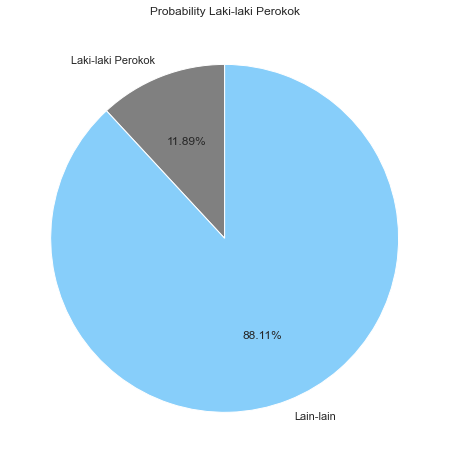

In [39]:
# Visualisasi probability laki-laki perokok

# Hitung jumlah kasus yang tidak memenuhi kriteria
other_count_2 = len(df) - pria_perokok 

# Data untuk pie chart
labels = ['Laki-laki Perokok', 'Lain-lain']
sizes = [pria_perokok, other_count_2]
colors = ['grey', 'lightskyblue']

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Probability Laki-laki Perokok')
plt.show()

- Terlihat Probability Laki-laki Perokok
- Dalam konteks ini dapat disimpulkan bahwa probability seorang laki-laki perokok sebesar 11.89% berbanding lain-lain 88.11%

3.2.7 Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region

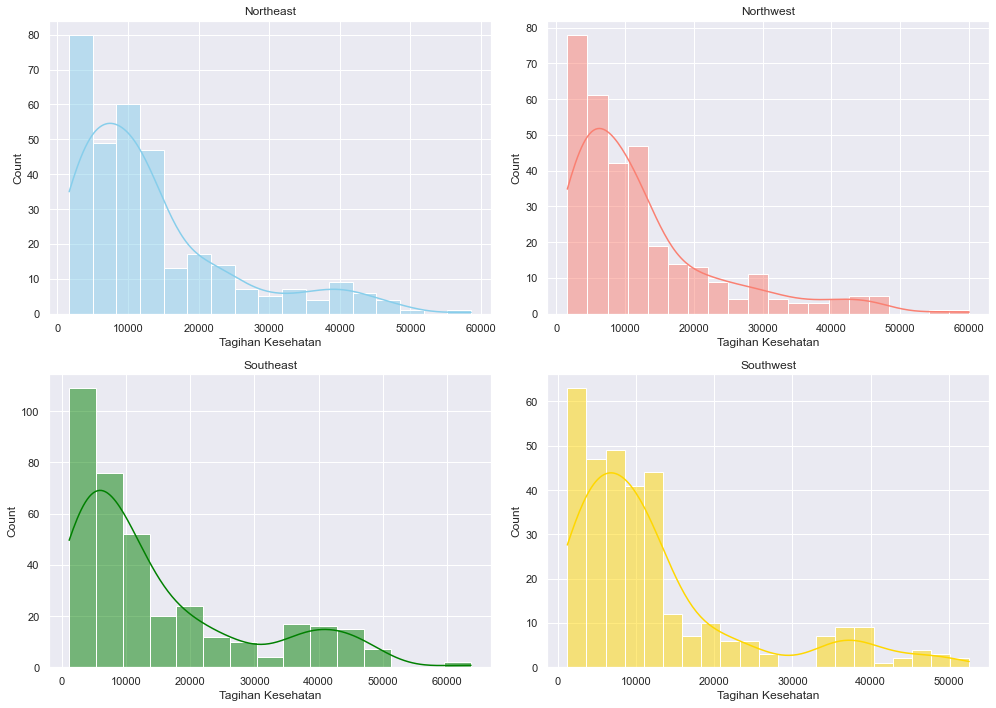

In [40]:
# Visualisasi distribusi tagihan kesehatan untuk setiap region menggunakan histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(df[df['region'] == 'northeast']['charges'], kde=True, ax=axes[0, 0], color='skyblue').set(xlabel='Tagihan Kesehatan')
axes[0, 0].set_title('Northeast')

sns.histplot(df[df['region'] == 'northwest']['charges'], kde=True, ax=axes[0, 1], color='salmon').set(xlabel='Tagihan Kesehatan')
axes[0, 1].set_title('Northwest')

sns.histplot(df[df['region'] == 'southeast']['charges'], kde=True, ax=axes[1, 0], color='green').set(xlabel='Tagihan Kesehatan')
axes[1, 0].set_title('Southeast')

sns.histplot(df[df['region'] == 'southwest']['charges'], kde=True, ax=axes[1, 1], color='gold').set(xlabel='Tagihan Kesehatan')
axes[1, 1].set_title('Southwest')

plt.tight_layout()
plt.show()

- Terlihat visualisasi distribusi tagihan untuk tiap-tiap region
- Dalam konteks ini dapat disimpulkan ke-empat region Northeast, Northwest, Southeast dan Southwest mempunyai distribusi tagihan yang mirip yaitu Positively Skewed Distribution / right-skewed distribution  

### 3.3 Analisa Variabel Kontinu

3.3.1 Mana yang lebih mungkin terjadi

       1. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
       2. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [41]:
# Hitung seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7K
# Peluang seseorang memiliki BMI di atas 25
prob_bmi_diatas_25 = len(df[df['bmi'] > 25]) / len(df)

# Peluang seseorang memiliki BMI dibawah 25
prob_bmi_dibawah_25 = len(df[df['bmi'] < 25]) / len(df)

# Peluang seseorang memiliki tagihan kesehatan diatas 16.7k
prob_charges_diatas_16_7k = len(df[df['charges'] > 16700]) / len(df)

# Peluang seseorang memiliki BMI di atas 25 dan tagihan kesehatan diatas 16.7k
prob_bmi_diatas_25_and_charges_diatas_16_7k = len(df[(df['bmi'] > 25) & (df['charges'] > 16700)]) / len(df)

# Peluang seseorang memiliki BMI dibawah 25 dan tagihan kesehatan diatas 16.7k
prob_bmi_dibawah_25_dan_charges_diatas_16_7k = len(df[(df['bmi'] < 25) & (df['charges'] > 16700)]) / len(df)

# Cetak hasil
print(f"Peluang seseorang yang BMI nya diatas 25                            : {prob_bmi_diatas_25:.2%}")
print(f"Peluang seseorang yang BMI nya dibawah 25                           : {prob_bmi_dibawah_25:.2%}")
print(f"Peluang seseorang yang tagihannya diatas 16.7k                      : {prob_charges_diatas_16_7k:.2%}")
print(f"Peluang seseorang yang BMI nya diatas 25 dan tagihan diatas 16.7k   : {prob_bmi_diatas_25_and_charges_diatas_16_7k:.2%}")
print(f"Peluang seseorang yang BMI nya dibawah 25 dan tagihan diatas 16.7k  : {prob_bmi_dibawah_25_dan_charges_diatas_16_7k:.2%}")

Peluang seseorang yang BMI nya diatas 25                            : 81.53%
Peluang seseorang yang BMI nya dibawah 25                           : 18.32%
Peluang seseorang yang tagihannya diatas 16.7k                      : 24.98%
Peluang seseorang yang BMI nya diatas 25 dan tagihan diatas 16.7k   : 21.17%
Peluang seseorang yang BMI nya dibawah 25 dan tagihan diatas 16.7k  : 3.81%


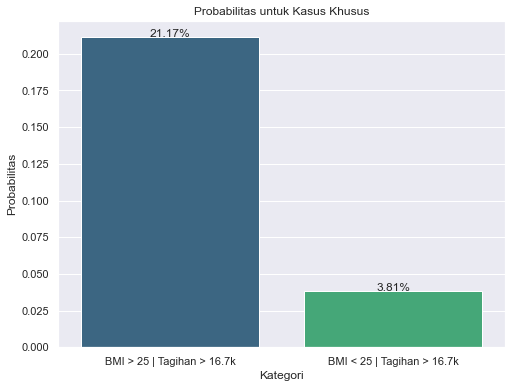

In [42]:
# Visualisasi peluang untuk seseorang yang BMI diatas 25 dan dibawah 25 mendapatkan tagihan diatas 16.7k
data = {
    'Probabilitas': [prob_bmi_diatas_25_and_charges_diatas_16_7k, prob_bmi_dibawah_25_dan_charges_diatas_16_7k],
    'Kategori': ['BMI > 25 | Tagihan > 16.7k', 'BMI < 25 | Tagihan > 16.7k']
}
df_visualisasi = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Kategori', y='Probabilitas', data=df_visualisasi, palette='viridis')

# Menampilkan nilai probabilitas pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'), 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha = 'center', va = 'baseline')

# Menambahkan label dan judul
plt.xlabel('Kategori')
plt.ylabel('Probabilitas')
plt.title('Probabilitas untuk Kasus Khusus')
plt.show()

- Terlihat visualisasi untuk tiap-tiap Kategori
- Dalam konteks ini dapat, disimpulkan:
    - Peluang bahwa seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah 21.17%
    - Peluang bahwa seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k adalah 3.81%
- Jadi peluang seseorang dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k lebih besar dibanding seseorang dengan BMI dibawah 25

3.3.2 Mana yang lebih mungkin terjadi

       1. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
       2. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [43]:
# Perhitungan probabilitas seseorang perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k
prob_perokok_bmi_diatas_25_dan_tagihan_diatas_16_7k = len(df[(df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700)]) / len(df)

# Perhitungan probabilitas seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k
prob_non_perokok_bmi_diatas_25_dan_tagihan_diatas_16_7k = len(df[(df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700)]) / len(df)

# Menampilkan hasil
print(f"Probabilitas seseorang perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k      : {prob_perokok_bmi_diatas_25_dan_tagihan_diatas_16_7k:.2%}")
print(f"Probabilitas seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k  : {prob_non_perokok_bmi_diatas_25_dan_tagihan_diatas_16_7k:.2%}")


Probabilitas seseorang perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k      : 16.08%
Probabilitas seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k  : 5.09%


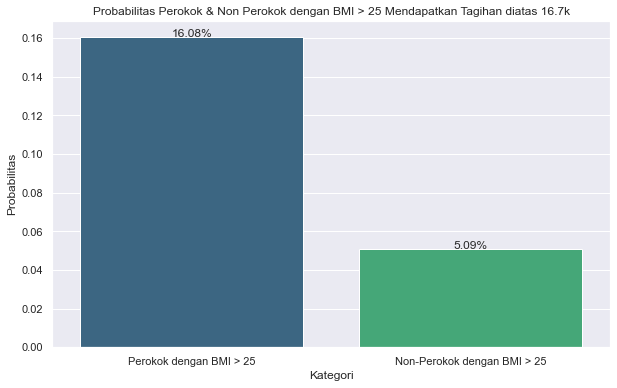

In [56]:
# Visualisasi probabilitas seseorang perokok dan nonn perokok dengan BNI diatas 25 mendapatkan tagihan diats 16.7k

data = {
    'Probabilitas': [prob_perokok_bmi_diatas_25_dan_tagihan_diatas_16_7k, prob_non_perokok_bmi_diatas_25_dan_tagihan_diatas_16_7k],
    'Kategori': ['Perokok dengan BMI > 25', 'Non-Perokok dengan BMI > 25']
}
df_visualisasi = pd.DataFrame(data)

# Membuat visualisasi
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Kategori', y='Probabilitas', data=df_visualisasi, palette='viridis')

# Menampilkan nilai probabilitas pada setiap bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2%'), 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha = 'center', va = 'baseline')

# Menambahkan label dan judul
plt.xlabel('Kategori')
plt.ylabel('Probabilitas')
plt.title('Probabilitas Perokok & Non Perokok dengan BMI > 25 Mendapatkan Tagihan diatas 16.7k')
plt.show()

- Terlihat visualisasi untuk tiap-tiap kondisi
- Dalam konteks ini dapat, disimpulkan:
    - Peluang seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k adalah 16.08%
    - Peluang seseorang Non-Perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k adalah 5.09%
- Jadi peluang seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k lebih besar dibanding non perokok

### 4.3 Analisa Korelasi Variabel

4.3.1 Korelasi antara tagihan kesehatan dengan BMI

In [45]:
# Mengecek korelasi antara Tagihan dan BMI dengan fungsi .corr
corr_charges_bmi = df['charges'].corr(df['bmi'])

print(f"Korelasi antara Tagihan dan BMI: {corr_charges_bmi}")


Korelasi antara Tagihan dan BMI: 0.1984008312262494


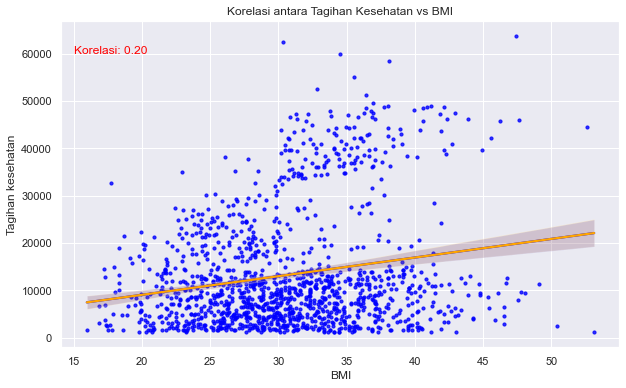

In [46]:
# Visualisasi korelasi antara Tagihan vs BMI

plt.figure(figsize=(10, 6))
scatter = sns.regplot(x='bmi', y='charges', data=df, color='blue', scatter_kws={'s': 10})

# Menambahkan trendline dengan warna berbeda
sns.regplot(x='bmi', y='charges', data=df, scatter=False, ax=scatter, color='orange')

# Menampilkan nilai koefisien korelasi yang dibulatkan 2 angka dibelakang koma
plt.text(15, 60000, f'Korelasi: {corr_charges_bmi:.2f}', fontsize=12, color='red')

plt.title('Korelasi antara Tagihan Kesehatan vs BMI')
plt.xlabel('BMI')
plt.ylabel('Tagihan kesehatan')
plt.show()


- Dalam konteks ini dapat disimpulkan:
    - Korelasi positif: Menunjukkan bahwa ada hubungan searah yang positif antara dua variabel. Hal ini mengindikasikan bahwa ketika nilai BMI naik, begitu pula dengan tagihan kesehatan
    - Hubungan yang lemah: Meskipun ada hubungan positif tetapi nilai korelasinya rendah (sekitar 0,20). Akibatnya, perubahan nilai BMI hanya berdampak kecil pada perubahan tagihan kesehatan. Korelasi ini tidak cukup untuk membuat perkiraan yang akurat mengenai tagihan kesehatan hanya berdasarkan BMI.

4.3.2 Korelasi antara tagihan kesehatan dengan tanggungan anak

In [47]:
corr_charges_children = df['charges'].corr(df['children'])

print(f"Korelasi antara Tagihan dan Tanggungan anak: {corr_charges_children}")

Korelasi antara Tagihan dan Tanggungan anak: 0.06738935083963243


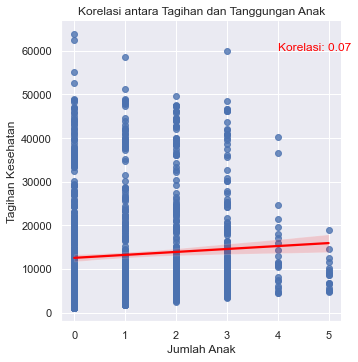

In [48]:
# Visualisasi korelasi antara Tagihan vs Tanggungan anak

# Scatter plot dengan trendline
sns.lmplot(x='children', y='charges', data=df, line_kws={'color': 'red'})
plt.text(4, 60000, f'Korelasi: {corr_charges_children:.2f}', fontsize=12, color='red') # Nilai korelasi dibulatkan 2 angka dibelakang koma

# Menambahkan judul dan label sumbu
plt.title('Korelasi antara Tagihan dan Tanggungan Anak')
plt.xlabel('Jumlah Anak')
plt.ylabel('Tagihan Kesehatan')
plt.show()


- Dalam konteks ini dapat disimpulkan:
    - Korelasi positif: Menunjukkan bahwa ada hubungan searah yang positif antara dua variabel. Hal ini mengindikasikan bahwa ketika jumlah anak bertambah, begitu pula dengan tagihan kesehatan
    - Hubungan yang lemah: Meskipun ada hubungan positif tetapi nilai korelasinya rendah (sekitar 0,07). Akibatnya, pertambahan jumlah anak hanya berdampak kecil pada perubahan tagihan kesehatan. Korelasi ini tidak cukup untuk membuat perkiraan yang akurat mengenai tagihan kesehatan hanya berdasarkan jumlah anak.

### 5.3 Pengujian Hipotesis

5.3.1 Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok


In [49]:
# Import fungsi yang dibutuhkan
from scipy.stats import ttest_ind

# Pisahkan data tagihan kesehatan antara perokok dan non-perokok
charges_perokok = df[df['smoker'] == 'yes']['charges']
charges_non_perokok = df[df['smoker'] == 'no']['charges']

# Lakukan uji t-test
t_statistic, p_value = ttest_ind(a=charges_perokok, b=charges_non_perokok, equal_var=False, alternative='two-sided')



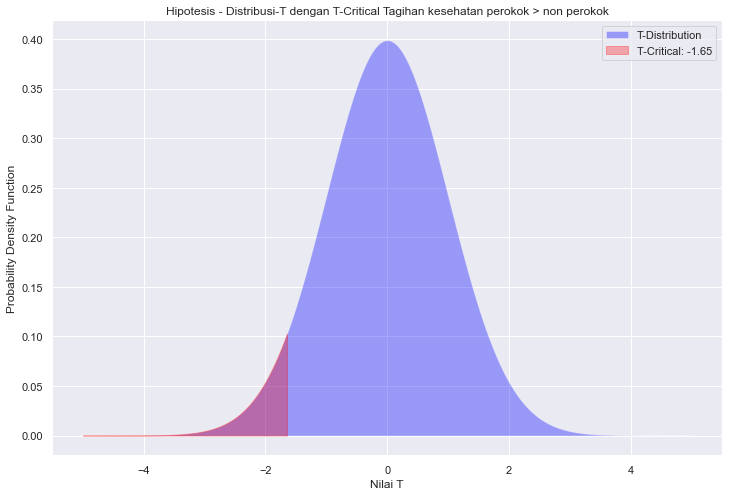

T-Statistic : 5.970661287813249
P-Value     : 0.00000000198998
T-Critical  : -1.6459958243460597

Pengambilan Keputusan:
Tolak hipotesis nol (H0).
Terdapat perbedaan yang signifikan antara tagihan kesehatan perokok dan non-perokok.


In [59]:
# Visualisasi T-Distribution hipotesis tagihan kesehatan porokok dan non perokok dengan menampikan nilai t-critical dan t-statistic
from scipy.stats import t

# Hitung degree of freedom
degree_of_freedom = len(charges_perokok) + len(charges_non_perokok) - 2

# Tingkat signifikansi yang umum: 0.05
alpha = 0.05

# Hitung critical value untuk alpha = 0.05
t_crit = t.ppf(alpha, degree_of_freedom)

# Visualisasi T-Distribution
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, degree_of_freedom)

plt.figure(figsize=(12, 8))

# Area diatas kurva t-critical
plt.fill_between(x, y, label=f'T-Distribution', 
                    facecolor='blue',
                    alpha=0.35)

# Area kritis / Are dibawah kurva t-critical
plt.fill_between(x, y, where=(x < t_crit), 
                 color='red', alpha=0.3, 
                 label=f'T-Critical: {round(t_crit, 2)}')

# Tandai T-Statistic
# plt.axvline(x=t_statistic, color='green', linestyle='--', label=f'T-Statistic {round(t_statistic, 2)}')

plt.title('Hipotesis - Distribusi-T dengan T-Critical Tagihan kesehatan perokok > non perokok')
plt.xlabel('Nilai T')
plt.ylabel('Probability Density Function')
plt.legend(loc='upper right')
plt.show()

# Tampilkan hasil uji
print(f"T-Statistic : {t_statistic}")
print(f"P-Value     : {p_value:.14f}")
print(f"T-Critical  : {t_crit}")

# Ambil keputusan berdasarkan p-value
print("\nPengambilan Keputusan:")

# Jika p_value lebih kecil dari alpha maka:
if p_value < alpha:
    print("Tolak hipotesis nol (H0).")
    print("Terdapat perbedaan yang signifikan antara tagihan kesehatan perokok dan non-perokok.")
# Jika p_value lebih besar dari alpha maka:
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Tidak ada perbedaan signifikan antara tagihan kesehatan perokok dan non-perokok.")



- Kesimpulan:
    - Tolak hipotesis nol (H0)
    - Terdapat perbedaan yang signifikan antara tagihan kesehatan perokok dan non-perokok

5.3.2 Variansi tagihan kesehatan perokok dan non perokok sama


In [51]:
# Fungsi from scipy.stats import f :
# Ini umumnya disebut sebagai uji perbandingan varians atau F-test untuk kesamaan varians
# Uji distribusi F biasanya digunakan untuk membandingkan varians dari dua atau lebih kelompok data

from scipy.stats import f

# Hitung varians dari tagihan kesehatan perokok dan non perokok
var_perokok = np.var(charges_perokok, ddof=1)
var_non_perokok = np.var(charges_non_perokok, ddof=1)

# Hitung nilai statistik uji F
f_statistic = var_perokok / var_non_perokok

# Tingkat signifikansi yang umum: 0.05
alpha = 0.05

# Hitung nilai kritis dan p-value
df_perokok = len(charges_perokok) - 1
df_non_perokok = len(charges_non_perokok) - 1
f_critical = f.ppf(1 - alpha/2, df_perokok, df_non_perokok)
p_value = 2 * (1 - f.cdf(f_statistic, df_perokok, df_non_perokok))

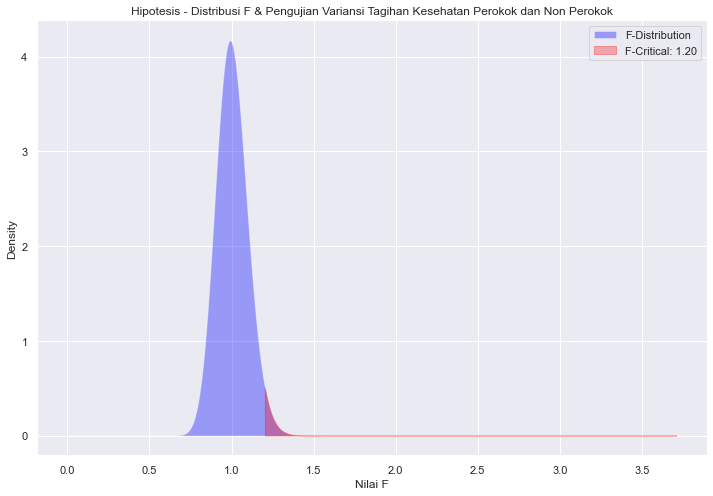

F-Statistic : 3.708884457528232
F-Critical  : 1.2009182136569876
P-Value     : 0.00000000198998230653

Pengambilan Keputusan:
Tolak hipotesis nol (H0).
Varians tagihan kesehatan perokok dan non-perokok tidak sama.


In [60]:
# Visualisasi F-distribusi Hipotesis Variansi tagihan kesehatan perokok dan non perokok apakah sama

x = np.linspace(0, max(f_statistic, f_critical), 1000)
y = f.pdf(x, df_perokok, df_non_perokok)

plt.figure(figsize=(12, 8))

# Area diatas kurva t-critical
plt.fill_between(x, y, label=f'F-Distribution', 
                    facecolor='blue',
                     alpha=0.35)

# Area kritis / Area dibawah kurva t-critical
plt.fill_between(x, y, where=(x > f_critical), 
                 color='red', alpha=0.3, 
                 label=f'F-Critical: {f_critical:.2f}')

# Nilai statistik uji F
# plt.axvline(x=f_statistic, color='green', linestyle='--', label=f'F-statistic {f_statistic:.2f}')

plt.title('Hipotesis - Distribusi F & Pengujian Variansi Tagihan Kesehatan Perokok dan Non Perokok')
plt.xlabel('Nilai F')
plt.ylabel('Density')
plt.legend()
plt.show()

# Tampilkan hasil uji
print(f"F-Statistic : {f_statistic}")
print(f"F-Critical  : {f_critical}")
print(f"P-Value     : {p_value:.20f}")

# Ambil keputusan berdasarkan p-value
print("\nPengambilan Keputusan:")
# Jika p_value lebih kecil dari alpha maka:
if p_value < alpha:
    print("Tolak hipotesis nol (H0).")
    print("Varians tagihan kesehatan perokok dan non-perokok tidak sama.")
# Jika p_value lebih besar dari alpha maka:
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol.")
    print("Varians tagihan kesehatan perokok dan non-perokok sama.")


- Kesimpulan:
    - Tolak hipotesis nol (H0)
    - Variansi tagihan kesehatan perokok tidak sama dengan tagihan kesehatan non perokok

5.3.3 Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25


In [53]:
from scipy.stats import ttest_ind

# Pisahkan data tagihan kesehatan antara BMI di atas 25 dan di bawah 25
charges_bmi_diatas_25 = df[df['bmi'] > 25]['charges']
charges_bmi_dibawah_25 = df[df['bmi'] <= 25]['charges']

# Lakukan uji t-test independen
t_statistic, p_value = ttest_ind(a=charges_bmi_diatas_25, b=charges_bmi_dibawah_25, equal_var=False, alternative='greater')

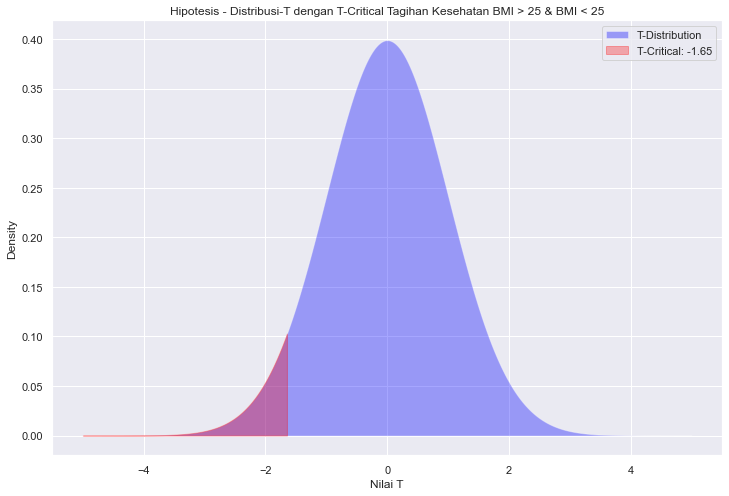

T-Statistic : 5.970661287813249
P-Value     : 0.000000001989982
T-Critical  : -1.6459958243460597

Pengambilan Keputusan:
Tolak hipotesis nol (H0).
Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada BMI dibawah 25.


In [62]:
# Visualisasi T-Distribution hipotesis tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada BMI dibawah 25
# Menampikan nilai t-critical dan t-statistic

# Hitung degree of freedom
degree_of_freedom = len(charges_bmi_diatas_25) + len(charges_bmi_dibawah_25) - 2

# Tingkat signifikansi yang umum: 0.05
alpha = 0.05

# Hitung critical value untuk alpha = 0.05
t_crit = t.ppf(alpha, degree_of_freedom)

# Visualisasi T-Distribution
x = np.linspace(-5, 5, 1000)
y = t.pdf(x, degree_of_freedom)

# Area diatas kurva untuk t-critical
plt.figure(figsize=(12, 8))
plt.fill_between(x, y, label=f'T-Distribution', 
                    facecolor='blue',
                    alpha=0.35)

# Tandai daerah kritis / Area dibawah kurva t-critical
plt.fill_between(x, y, where=(x < t_crit), 
                 color='red', alpha=0.3, 
                 label=f'T-Critical: {round(t_crit, 2)}')

# Tandai T-Statistic
# plt.axvline(x=t_statistic, color='green', linestyle='--', label=f'T-Statistic {round(t_statistic, 2)}')

plt.title('Hipotesis - Distribusi-T dengan T-Critical Tagihan Kesehatan BMI > 25 & BMI < 25')
plt.xlabel('Nilai T')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

# Tampilkan hasil uji
print(f"T-Statistic : {t_statistic}")
print(f"P-Value     : {p_value:.15f}")
print(f"T-Critical  : {t_crit}")

# Ambil keputusan berdasarkan p-value
print("\nPengambilan Keputusan:")

# Jika p_value lebih kecil dari alpha maka:
if p_value < alpha:
    print("Tolak hipotesis nol (H0).")
    print("Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada BMI dibawah 25.")
# Jika p_value lebih besar dari alpha maka:
else:
    print("Gagal tolak hipotesis nol (H0)")
    print("Tidak ada perbedaan signifikan antara tagihan kesehatan dengan BMI diatas 25 dan dibawah 25.")


- Kesimpulan:
    - Tolak Hipotesis nol (H0)
    - Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada BMI di bawah 25.

# Kesimpulan

Analisis Descriptive Statistic:

- Rata-rata umur pada dataframe adalah 39.22 tahun.
- Rata-rata BMI perokok adalah 30.71.
- Variansi tagihan perokok lebih besar dibanding non-perokok (133207311.21 vs. 35925420.50).
- Tidak ada perbedaan umur yang signifikan antara pria perokok dan wanita perokok.
- Rata-rata tagihan perokok jauh lebih besar dari rata-rata tagihan non-perokok.
- Rata-rata tagihan perokok yang BMI diatas 25 jauh lebih besar dari rata-rata tagihan non-perokok yang BMI diatas 25.
- Tidak ada perbedaan yang signifikan antara rata-rata BMI perokok dan BMI non-perokok.

Analisis Variabel Diskrit:

- Rata-rata tagihan kesehatan pria lebih besar dibandingkan wanita.
- Distribusi peluang tagihan tertinggi ada di region Southeast.
- Proporsi perokok lebih rendah daripada non-perokok.
- Peluang seorang perempuan adalah perokok sekitar 8.60%, sedangkan peluang seorang laki-laki adalah perokok sekitar 11.89%.
- Distribusi tagihan keempat region adalah Positively Skewed.

Analisis Variabel Kontinu:

- Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k lebih besar daripada seseorang dengan BMI dibawah 25.
- Peluang perokok dengan BMI diatas 25 mendapatkan tagihan diatas 16.7k lebih besar daripada non-perokok.

Analisis Korelasi Variabel:

- Korelasi positif antara tagihan kesehatan dan BMI, tetapi hubungannya lemah.
- Korelasi positif antara tagihan kesehatan dan jumlah tanggungan anak, tetapi hubungannya lemah.

Pengujian Hipotesis:

- Terdapat perbedaan yang signifikan antara tagihan kesehatan perokok dan non-perokok (Tolak H0).
- Variansi tagihan kesehatan perokok tidak sama dengan tagihan kesehatan non-perokok (Tolak H0).
- Tagihan kesehatan dengan BMI di atas 25 lebih tinggi daripada tagihan kesehatan dengan BMI di bawah 25 (Tolak H0).

### Kesimpulan Umum:

- Tagihan kesehatan sangat dipengaruhi oleh kebiasaan merokok, BMI diatas 25, dan jenis kelamin.
- Rata-rata tagihan perokok lebih tinggi, dan variansinya juga lebih besar dibandingkan non-perokok.
- Individu dengan BMI diatas 25 cenderung memiliki tagihan kesehatan yang lebih tinggi.
- Hubungan antara tagihan kesehatan dengan umur dan jumlah tanggungan anak lemah.
- Diperlukan langkah-langkah pencegahan dan edukasi kesehatan, terutama pada kelompok risiko tinggi seperti perokok dan individu dengan BMI tinggi.

## Further Research

Berdasarkan analisis yang telah dilakukan, saran perbaikan dapat melibatkan fokus pada faktor-faktor yang signifikan memengaruhi tagihan kesehatan, seperti merokok, BMI diatas 25, dan jenis kelamin. Perluasan analisis dapat mencakup pemahaman lebih mendalam terkait faktor-faktor tersebut, mungkin dengan mempertimbangkan variabel tambahan atau memeriksa interaksi antar variabel. Selain itu, dalam mendalami korelasi, bisa dilakukan analisis lebih lanjut untuk mengevaluasi hubungan potensial antara variabel kesehatan dan variabel lainnya seperti gaya hidup dan riwayat kesehatan. Implementasi langkah-langkah pencegahan dan kampanye edukasi kesehatan dapat direkomendasikan, khususnya untuk kelompok risiko tinggi seperti perokok dan individu dengan BMI tinggi.

## Reference

LMS Pacmann - Probability

### Terima kasih telah meluangkan waktu untuk membaca tulisan ini.
Saya sedang belajar menulis, dan jika ada kesalahan maka tidak mungkin bisa saya dihindari bahkan ketika saya sudah berusaha sekuat tenaga. Silakan berikan feedback dan rekomendasi. Beri tahu saya jika Anda menemukan kesulitan atau kesalahan